### 저장한 모델을 로드해 과일 분류

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary
import cv2

from PIL import Image

from torchvision import transforms
from torchvision.transforms import v2

import pandas as pd
import os

import matplotlib.pyplot as plt

In [2]:
# 저장 경로
SAVE_PATH = './models/project/'

# 모델 구조 및 파라미터 저장 파일명
SAVE_MODEL = SAVE_PATH+'loss_0.083_score0.976.pth'

#### 모델 로딩

In [3]:
fruitModel = torch.load(SAVE_MODEL, weights_only= False, map_location=torch.device('cpu'))
# GPU에서 생성한 모델 => 모델 로드 시 map_location=torch.device('cpu')

In [4]:
summary(fruitModel)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            (9,408)
├─BatchNorm2d: 1-2                       (128)
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─Bottleneck: 2-1                   --
│    │    └─Conv2d: 3-1                  (4,096)
│    │    └─BatchNorm2d: 3-2             (128)
│    │    └─Conv2d: 3-3                  (36,864)
│    │    └─BatchNorm2d: 3-4             (128)
│    │    └─Conv2d: 3-5                  (16,384)
│    │    └─BatchNorm2d: 3-6             (512)
│    │    └─ReLU: 3-7                    --
│    │    └─Sequential: 3-8              (16,896)
│    └─Bottleneck: 2-2                   --
│    │    └─Conv2d: 3-9                  (16,384)
│    │    └─BatchNorm2d: 3-10            (128)
│    │    └─Conv2d: 3-11                 (36,864)
│    │    └─BatchNorm2d: 3-12            (128)
│    │    └─C

In [5]:
transform = transforms.Compose([transforms.Resize([256]), transforms.CenterCrop(224),transforms.ToTensor(),
                           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [6]:
target = ['Apple', 'Banana', 'Orange', 'Strawberry']

In [7]:
img1 = './images/banana01.jpg'
img2 = './images/strawberry03.jpg'

In [8]:
image1 = Image.open(img1).convert('RGB')
image2 = Image.open(img2).convert('RGB')

In [9]:
pil_image1 = transform(image1).unsqueeze(0)
pil_image2 = transform(image2).unsqueeze(0)

In [10]:
pil_image1.shape
pil_image2.shape

torch.Size([1, 3, 224, 224])

In [11]:
# 모델 테스트
fruitModel.eval()
result = fruitModel(pil_image1)
result2 = fruitModel(pil_image2)

In [12]:
result2

tensor([[-8.9730,  5.6167, -2.9731, 20.4166]], grad_fn=<AddmmBackward0>)

In [13]:
idx = result2.argmax().item()
idx

3

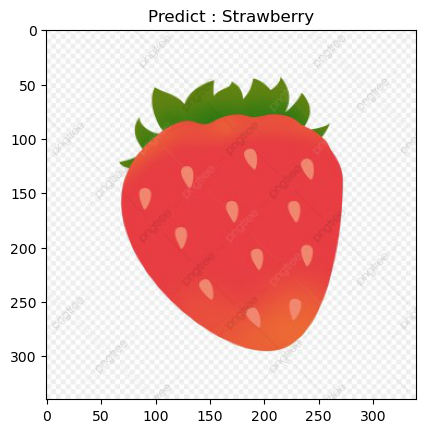

In [14]:
plt.imshow(image2)
plt.title(f'Predict : {target[idx]}')
plt.show()